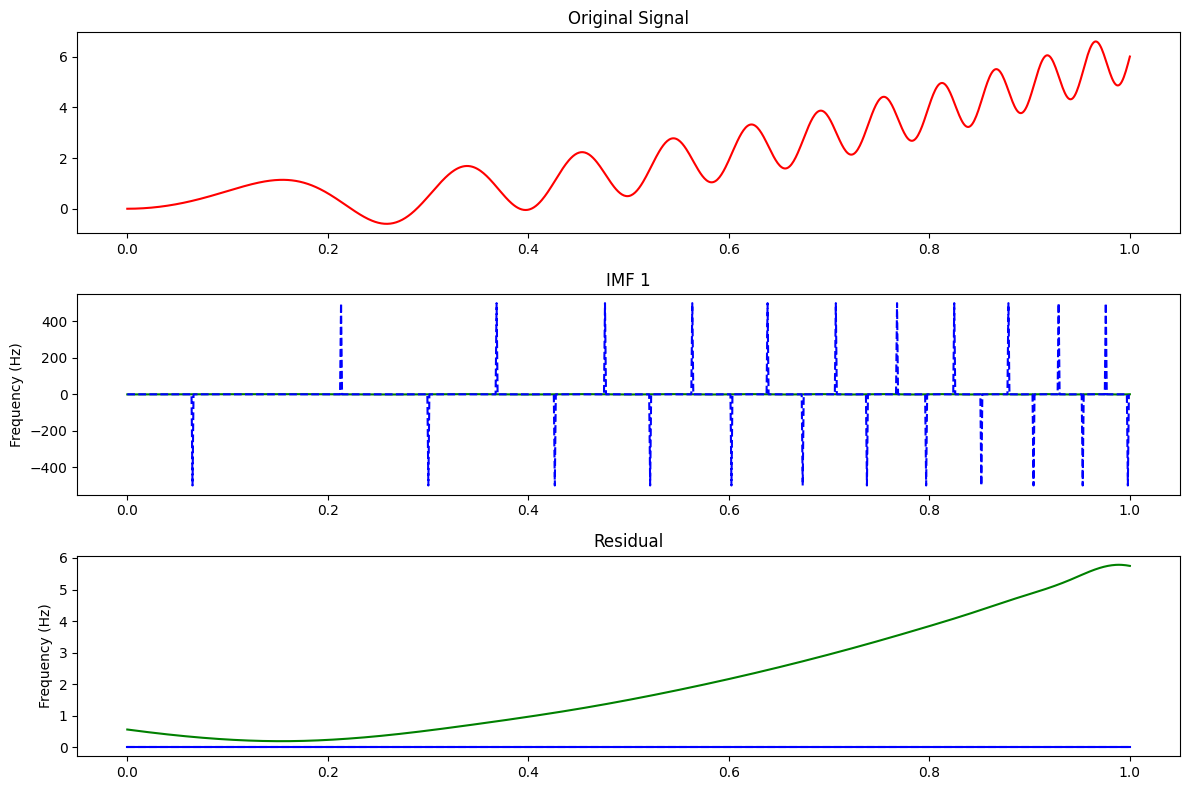

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD

def instantaneous_frequency(imf, t):
    # 计算瞬时频率
    dt = t[1] - t[0]
    inst_freq = np.diff(np.unwrap(np.angle(imf)))/(2*np.pi*dt)
    return inst_freq

# 生成示例数据
t = np.linspace(0, 1, 1000)
s = np.sin(11*2*np.pi*t*t) + 6*t*t

# 初始化EMD
emd = EMD()

# 对数据进行EMD分解
imfs = emd(s, t)
residual = s - np.sum(imfs, axis=0)  # 计算残差

# 绘制结果
plt.figure(figsize=(12,8))

plt.subplot(len(imfs)+1, 1, 1)
plt.plot(t, s, 'r')
plt.title("Original Signal")

for i in range(len(imfs)):
    plt.subplot(len(imfs)+1, 1, i+2)
    plt.plot(t, imfs[i], 'g')
    plt.title("IMF %d" %(i+1))
    
    # 显示瞬时频率
    inst_freq = instantaneous_frequency(imfs[i], t)
    plt.plot(t[:-1], inst_freq, 'b--')
    plt.ylabel("Frequency (Hz)")

plt.subplot(len(imfs)+1, 1, len(imfs)+1)
plt.plot(t, residual, 'b')
plt.title("Residual")

plt.tight_layout()
plt.show()


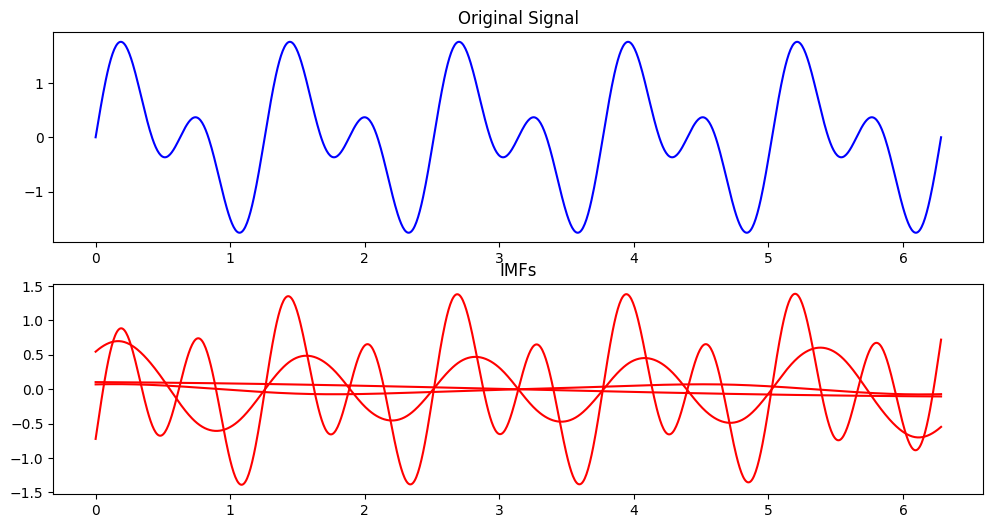

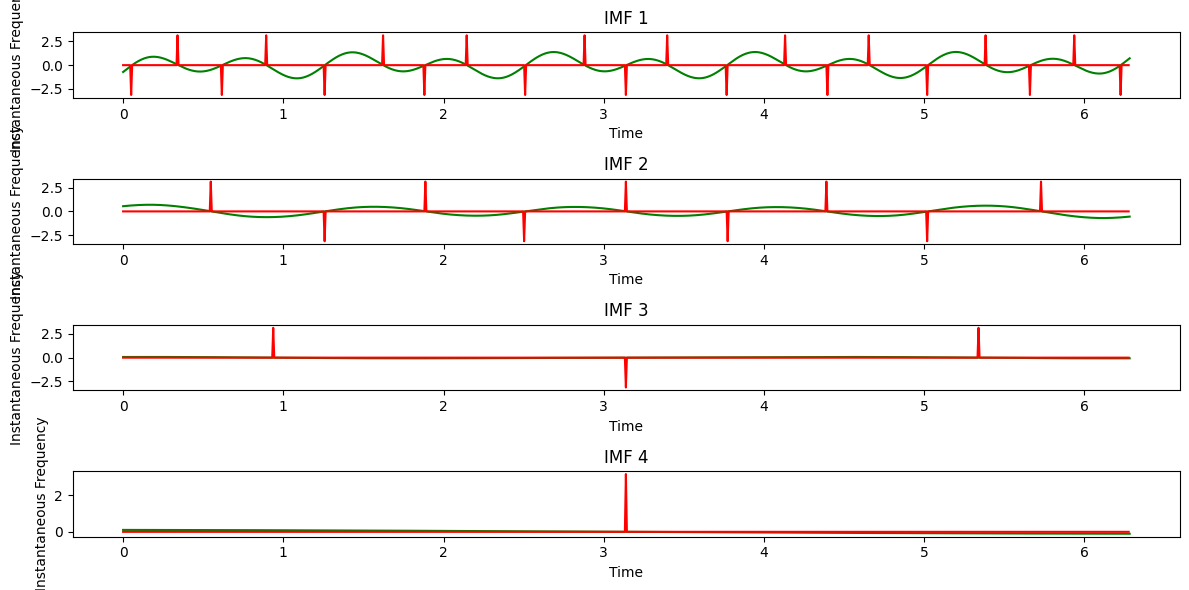

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD

# 生成合成信号
t = np.linspace(0, 2*np.pi, 1000)
signal = np.sin(5*t) + np.sin(10*t)

# 进行EMD分解
emd = EMD()
IMFs = emd(signal)

# 绘制原始信号
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, 'b')
plt.title('Original Signal')

# 绘制IMFs
plt.subplot(2, 1, 2)
plt.plot(t, IMFs.T, 'r')
plt.title('IMFs')

# 绘制每个IMF的时域曲线和瞬时频率
plt.figure(figsize=(12, 6))
for i, IMF in enumerate(IMFs):
    plt.subplot(len(IMFs), 1, i+1)
    plt.plot(t, IMF, 'g')
    plt.title('IMF {}'.format(i+1))
    plt.xlabel('Time')

    # 计算瞬时频率
    inst_freq = np.diff(np.unwrap(np.angle(IMF)))
    plt.plot(t[:-1], inst_freq, 'r')
    plt.ylabel('Instantaneous Frequency')

plt.tight_layout()
plt.show()


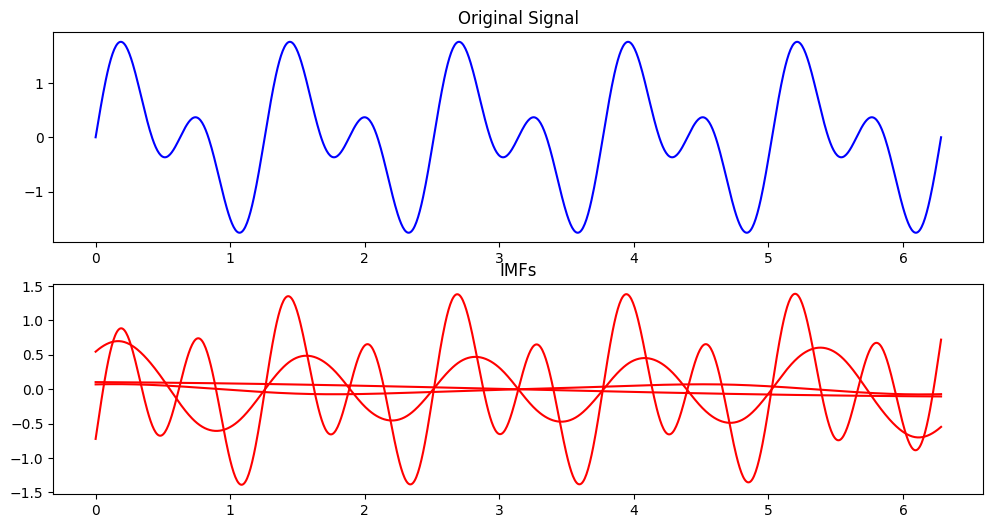

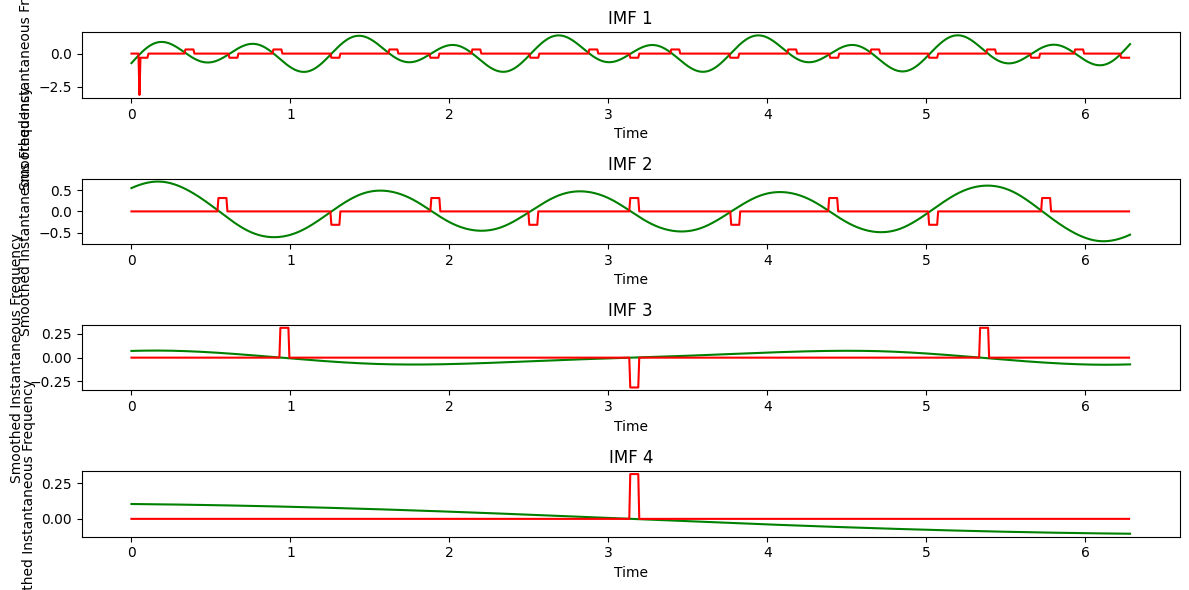

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD

# 定义移动平均滤波函数
def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    moving_averages = (cumsum[window_size - 1:] - cumsum[:-window_size + 1]) / window_size
    return np.concatenate((data[:window_size-1], moving_averages))

# 生成合成信号
t = np.linspace(0, 2*np.pi, 1000)
signal = np.sin(5*t) + np.sin(10*t)

# 进行EMD分解
emd = EMD()
IMFs = emd(signal)

# 绘制原始信号
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, 'b')
plt.title('Original Signal')

# 绘制IMFs
plt.subplot(2, 1, 2)
plt.plot(t, IMFs.T, 'r')
plt.title('IMFs')

# 绘制每个IMF的时域曲线和平滑后的瞬时频率
plt.figure(figsize=(12, 6))
for i, IMF in enumerate(IMFs):
    plt.subplot(len(IMFs), 1, i+1)
    plt.plot(t, IMF, 'g')
    plt.title('IMF {}'.format(i+1))
    plt.xlabel('Time')

    # 计算瞬时频率
    inst_freq = np.diff(np.unwrap(np.angle(IMF)))

    # 对瞬时频率进行移动平均滤波处理
    smoothed_inst_freq = moving_average(inst_freq, window_size=10)

    plt.plot(t[:-1], smoothed_inst_freq, 'r')
    plt.ylabel('Smoothed Instantaneous Frequency')

plt.tight_layout()
plt.show()
